In [1]:
%matplotlib inline

In [2]:
from d2l import torch as d2l
import torch
from torch import nn

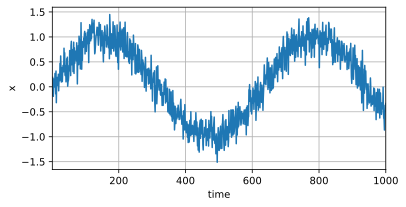

In [3]:
T = 1000
time = torch.arange(1, T + 1, dtype=torch.float32)
x = torch.sin(0.01 * time) + torch.normal(0, 0.2, (T,))
d2l.plot(time, [x], 'time', 'x', xlim=[1,1000], figsize=(6, 3))

In [4]:
tau = 4
features = torch.zeros((T - tau, tau))

In [5]:
features

tensor([[0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        ...,
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.]])

In [6]:
features.shape

torch.Size([996, 4])

In [7]:
for i in range(tau):
    features[:, i] = x[i: T - tau + i]

In [8]:
labels = d2l.reshape(x[tau:], (-1, 1))
labels

tensor([[ 1.5757e-01],
        [ 6.1300e-02],
        [ 1.3547e-02],
        [-4.0481e-03],
        [ 2.6712e-01],
        [ 2.2186e-02],
        [-1.4181e-01],
        [ 3.1440e-01],
        [-3.1747e-01],
        [ 6.7709e-02],
        [ 1.6225e-01],
        [ 1.8902e-01],
        [ 2.8610e-02],
        [ 4.1808e-02],
        [ 2.5267e-01],
        [-7.9056e-02],
        [ 1.4419e-01],
        [ 2.2786e-01],
        [ 1.2201e-01],
        [ 4.6835e-01],
        [ 1.3878e-01],
        [ 6.1721e-01],
        [ 3.1249e-01],
        [ 9.6689e-02],
        [ 3.8585e-01],
        [ 1.1768e-01],
        [ 1.0500e-01],
        [ 3.1505e-01],
        [ 4.2743e-01],
        [ 3.0962e-01],
        [ 3.0061e-01],
        [ 7.7265e-01],
        [ 5.2157e-01],
        [ 6.8080e-01],
        [ 2.3543e-01],
        [ 2.2209e-01],
        [ 4.2415e-01],
        [ 1.0009e-01],
        [ 2.2845e-01],
        [ 5.6181e-01],
        [ 3.5541e-01],
        [ 5.9366e-01],
        [ 1.2867e-02],
        [ 9

In [10]:
batch_size, n_train = 16, 600
train_iter = d2l.load_array((features[:n_train], labels[:n_train]), batch_size, is_train=True)

In [11]:
def init_weights(m):
    if type(m) == nn.Linear:
        nn.init.xavier_uniform_(m.weight)

def get_net():
    net = nn.Sequential(nn.Linear(4, 10),
                        nn.ReLU(),
                        nn.Linear(10, 1))
    net.apply(init_weights)
    return net

loss = nn.MSELoss()

In [12]:
def train(net, train_iter, loss, epochs, lr):
    trainer = torch.optim.Adam(net.parameters(), lr)
    for epoch in range(epochs):
        for X, y in train_iter:
            trainer.zero_grad()
            l = loss(net(X), y)
            l.backward()
            trainer.step()
        print(f'epoch {epoch + 1}, loss {d2l.evaluate_loss(net, train_iter, loss):f}')

net = get_net()
train(net, train_iter, loss, 5, 0.01)

epoch 1, loss 0.062387
epoch 2, loss 0.054159
epoch 3, loss 0.052676
epoch 4, loss 0.053780
epoch 5, loss 0.051668


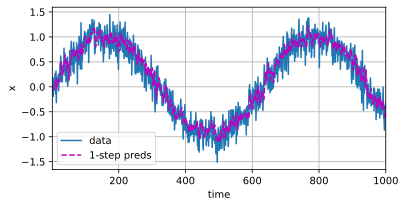

In [14]:
onestep_preds = net(features)
d2l.plot([time, time[tau:]], [d2l.numpy(x), d2l.numpy(onestep_preds)], 'time', 'x', legend=['data', '1-step preds'], xlim=[1,1000], figsize=(6, 3))

In [15]:
multistep_preds = torch.zeros(T)
multistep_preds[:n_train+tau] = x[:n_train+tau]
multistep_preds

tensor([ 0.1567,  0.1919, -0.1765, -0.1908,  0.1576,  0.0613,  0.0135, -0.0040,
         0.2671,  0.0222, -0.1418,  0.3144, -0.3175,  0.0677,  0.1622,  0.1890,
         0.0286,  0.0418,  0.2527, -0.0791,  0.1442,  0.2279,  0.1220,  0.4683,
         0.1388,  0.6172,  0.3125,  0.0967,  0.3859,  0.1177,  0.1050,  0.3150,
         0.4274,  0.3096,  0.3006,  0.7727,  0.5216,  0.6808,  0.2354,  0.2221,
         0.4241,  0.1001,  0.2285,  0.5618,  0.3554,  0.5937,  0.0129,  0.0996,
         0.1262,  0.2103,  0.4282,  0.3344,  0.7261,  0.3181,  0.6587,  0.2258,
         0.8251,  0.9109,  0.4411,  0.7491,  0.6478,  0.7187,  0.3043,  0.6299,
         0.8940,  0.2688,  0.7826,  0.4702,  0.6956,  0.5899,  0.7158,  0.6953,
         0.5181,  0.8811,  0.6081,  0.0587,  0.5925,  0.4375,  0.8253,  0.4468,
         1.0136,  0.9465,  0.7371,  0.6726,  0.3589,  0.5852,  1.2842,  0.6951,
         0.3531,  0.7913,  0.5276,  0.9059,  0.8155,  0.7913,  0.9769,  0.9171,
         1.0544,  1.1103,  0.6596,  1.07

In [17]:
for i in range(n_train + tau, T):
    multistep_preds[i] = net(d2l.reshape(multistep_preds[i - tau: i], (1, -1)))

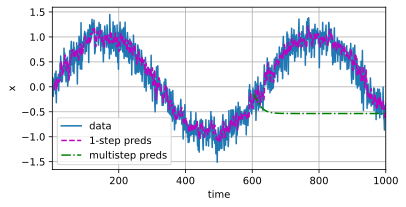

In [18]:
d2l.plot([time, time[tau:], time[n_train + tau:]],
         [d2l.numpy(x), d2l.numpy(onestep_preds),
          d2l.numpy(multistep_preds[n_train + tau:])], 'time',
         'x', legend=['data', '1-step preds', 'multistep preds'],
         xlim=[1, 1000], figsize=(6, 3))

In [20]:
max_steps = 64

features = torch.zeros((T - tau - max_steps + 1, tau + max_steps))
features.shape

torch.Size([933, 68])

In [21]:
for i in range(tau):
    features[:, i] = x[i:i+T-tau-max_steps+1]
features

tensor([[ 0.1567,  0.1919, -0.1765,  ...,  0.0000,  0.0000,  0.0000],
        [ 0.1919, -0.1765, -0.1908,  ...,  0.0000,  0.0000,  0.0000],
        [-0.1765, -0.1908,  0.1576,  ...,  0.0000,  0.0000,  0.0000],
        ...,
        [ 0.0802,  0.3544, -0.4724,  ...,  0.0000,  0.0000,  0.0000],
        [ 0.3544, -0.4724,  0.2398,  ...,  0.0000,  0.0000,  0.0000],
        [-0.4724,  0.2398,  0.1464,  ...,  0.0000,  0.0000,  0.0000]])

In [22]:
for i in range(tau, tau+max_steps):
    features[:, i] = d2l.reshape(net(features[:, i - tau : i]), -1)

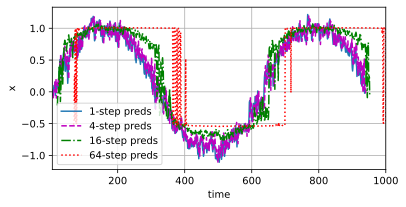

In [23]:
steps = (1, 4, 16, 64)
d2l.plot([time[tau + i - 1: T - max_steps + i] for i in steps],
         [d2l.numpy(features[:, tau + i - 1]) for i in steps], 'time', 'x',
         legend=[f'{i}-step preds' for i in steps], xlim=[5, 1000],
         figsize=(6, 3))